## EasyVisa Workbook.

## Problem Definition:-
American business is facing a huge demand for Foriegn worker as the American labor force is falling short in providing the qualified workforce, immigration programs are administered by the Office of Foreign Labor Certification (OFLC),they are faced with a huge number of applicants who need to be vetted for certification or not. Firm EasyVisa is hired to do data-driven solutions to help visa approvals, recommend a profile that shows the drivers that will give a clear indication of the applicants Certification or denial.

### Things we could be looking for.
1. If an applicants gets Certified or Denied.Since getting certified will be looking for Precision metric. Getting denied will indicate we looking at recall metric.I think both of the cases are important so we could go with the F1 score.
2. A profile for the Analytics firm to predict the drivers that will help predict profile of the applicant who gets Certified or Denied.

In [114]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [115]:
#Loading dataset
data=pd.read_csv("EasyVisa.csv")

In [116]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Since many of the columns are objects we need to make them as categorical values and then do dummy encoding to make them as 1 and 0's for running thru our classification models.

In [118]:
data.shape

(25480, 12)

#### Check for missing value

In [119]:
data.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no missing values in the data.

#### converting objects type to category

In [120]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


In [121]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


1. The no. of employees has a max of 600k. The mean value is 6000.
2. most of the companines are estabilished in 1979 the latest one is established in 2016.
3. The average salary of the person working is 75k and max is 319k.

In [122]:
data.describe(include="category").T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


1. There are 6 unique contienent and Asia being the top with a high frequency.
2. Top education that a person has is a Bachelor's degree with a higher frequency.
3. The people that have job experience is higher than ones that do not.
4. The no. of people not requiring training is higher than the people who do need training.
5. The region with the highest people employed is Northeast.
6. The wage for these people are mostly reported as yearly wages.
7. Many of the people coming to work have full time positions.
8. Out of 25k people 17k people are certified to work.


#### No. of occurances in each of the category.

In [123]:
print(data.continent.value_counts())
print(data.education_of_employee.value_counts())
print(data.has_job_experience.value_counts())
print(data.requires_job_training.value_counts())
print(data.region_of_employment.value_counts())
print(data.unit_of_wage.value_counts())
print(data.full_time_position.value_counts())
print(data.case_status.value_counts())

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Y    14802
N    10678
Name: has_job_experience, dtype: int64
N    22525
Y     2955
Name: requires_job_training, dtype: int64
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
Y    22773
N     2707
Name: full_time_position, dtype: int64
Certified    17018
Denied        8462
Name: case_status, dtype: int64


### Observation
 Most visa applicants are coming from Asia and they all have a bachelor's degree and have experience in their field of work.About 67% of the people are certified to work in the USA.

## EDA 
### Univariate Analysis

In [124]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

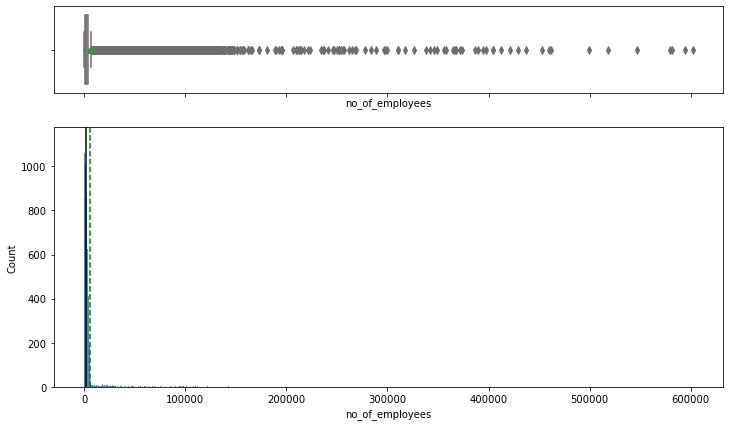

In [125]:
histogram_boxplot(data, "no_of_employees")

The No of employee are varying with a lot of outliers.

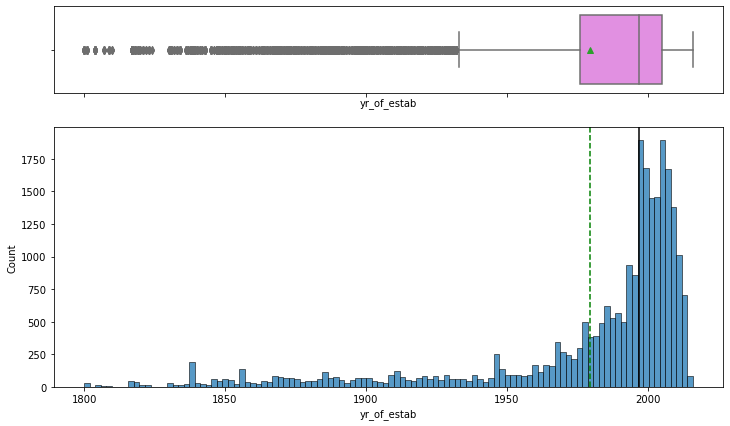

In [126]:
histogram_boxplot(data, "yr_of_estab")

The year of establishment of the company varies and average of them shows to be 1980. This data has a lot of outliers .
The distribution is asymmetric.

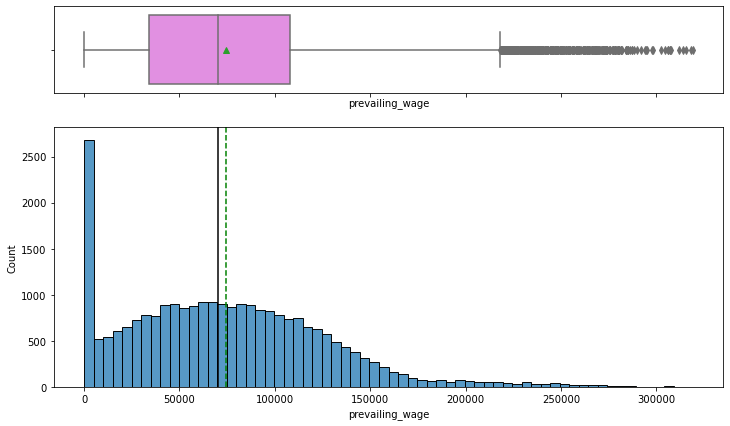

In [127]:
histogram_boxplot(data,"prevailing_wage")

There are many outliers for this data. The average wage is around 75k and mean and median are very close in value.

In [128]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

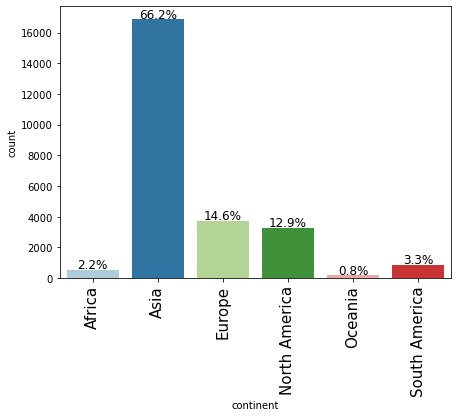

In [129]:
labeled_barplot(data, "continent",perc=True)

#### Observation
1. 66.2% of the visa workers are from asia.
2. 14.6% of the visa workers are from europe followed by 12.9% from North America. Rest of the continents are very small number of people.


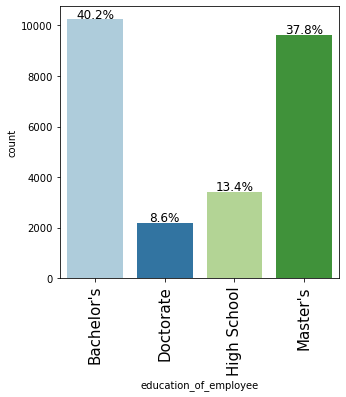

In [130]:
labeled_barplot(data, "education_of_employee",perc=True)

#### Observation
 40% are Bachelor's degree holders followed by  37.8% of Master degree holders. Very small percentage of doctors and High school applicants.

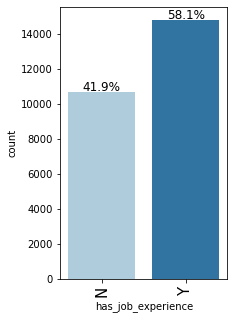

In [131]:
labeled_barplot(data, "has_job_experience",perc=True)

#### Observation
58.1% of the workers all have experience in their field of work, 41.9% do not have experience in their field of work.

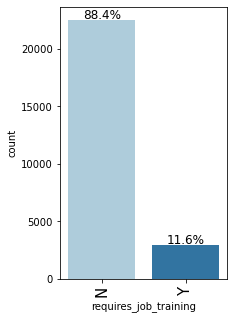

In [132]:
labeled_barplot(data, "requires_job_training",perc=True)

#### Observation
88.4% of visa requests do not need job training. only 11.6% require job training.

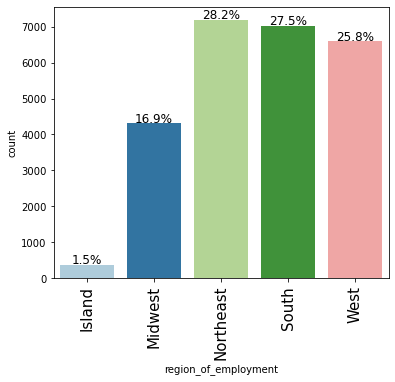

In [133]:
labeled_barplot(data, "region_of_employment",perc=True)

#### Observation
All the regions of Northeast, south and west have a high demand for these visa workers around 27% whereas  midwest shows a lower demand and island is very minimal.

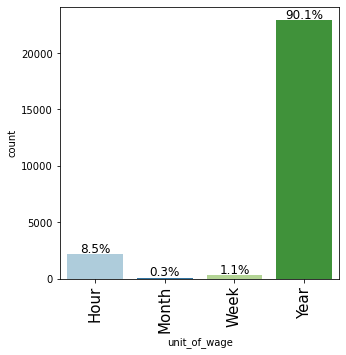

In [134]:
labeled_barplot(data, "unit_of_wage",perc=True)

#### Observation
The majority of the visa workers are all have income reported yearly about 90%. We have about 8.5% of the workers getting paid hourly.

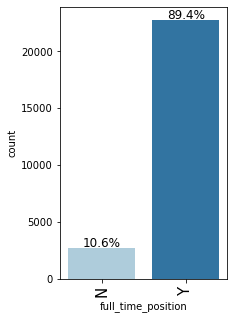

In [135]:
 labeled_barplot(data, "full_time_position",perc=True)

#### Observation
about 90% are employed full time and 10% of them are part time workers.

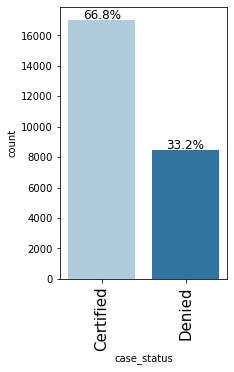

In [136]:
 labeled_barplot(data, "case_status",perc=True)

#### Observation
About 66% of the application for the visa workers are certified and 33% of them are denied.

## Bivariate Analysis

#### The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [137]:
## function to plot boxplots w.rt quality
def boxplot(x):
    plt.figure(figsize=(7,5))
    sns.boxplot(data['case_status'],x,palette="PuBu")
    plt.show()

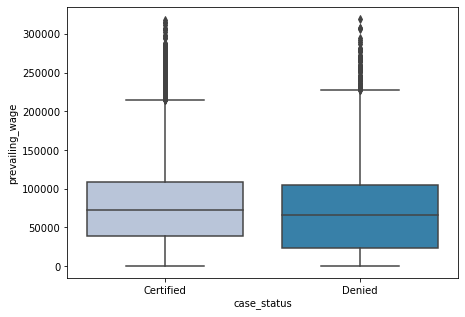

In [138]:
boxplot(data['prevailing_wage'])

#### Observation
The Mean wage is around 65k for the applicants who are certified. Q1 for the applicants that are denied is much lower than the Q1 for the ones that are certified.The average is also low for the Denied chart compared the certified one.

#### Changing case_status to a numeric data so we can do a catogorical plot.

In [139]:
data.replace(('Certified', 'Denied'), (1, 0), inplace=True)

#### How does the visa status vary across different continents?

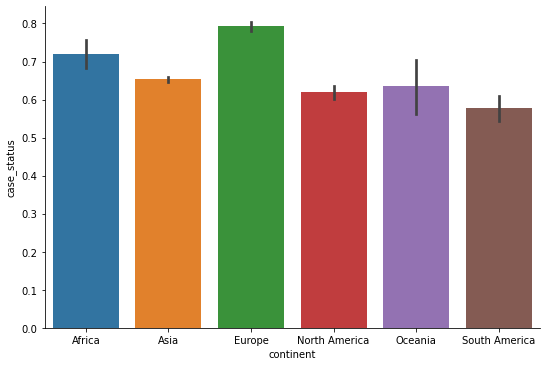

In [140]:
sns.catplot(x="continent",y="case_status", data=data, kind='bar', height=5, aspect=1.5, estimator=np.mean);

#### Observation
It does appear all of the continent have some portion of the workers that are getting the visa Certified. Europe seems to have a higher percentage of applicants that are Certified ,followed by africa.Asia comes in after.

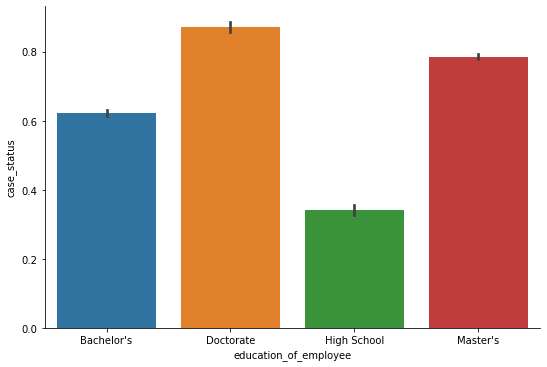

In [108]:
sns.catplot(x="education_of_employee",y="case_status", data=data, kind='bar', height=5, aspect=1.5, estimator=np.mean);

#### Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

#### Observation
Looks like visa applicants that have doctors or a masters degree, have a higher chance of them getting Certified. 
Holding a bachelor's degree have higher chances to get Certified compared to high schoolers.

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

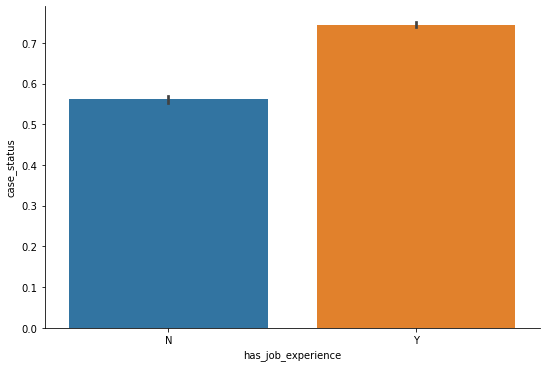

In [109]:
sns.catplot(x="has_job_experience",y="case_status", data=data, kind='bar', height=5, aspect=1.5, estimator=np.mean);

#### Observations
This shows that if you have job experience your chances of getting Certified are much higher than applicants with no job experience.

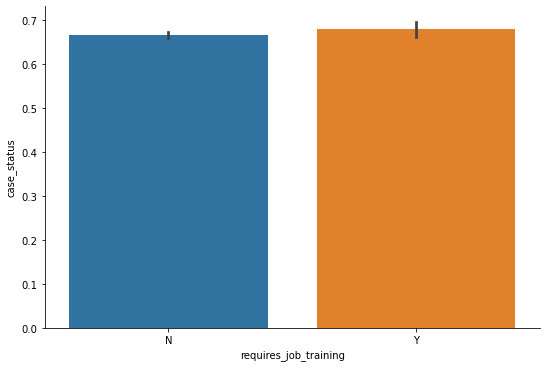

In [141]:
sns.catplot(x="requires_job_training",y="case_status", data=data, kind='bar', height=5, aspect=1.5, estimator=np.mean);

#### Observation
This EDA shows that if a person needed on the job training or did not need it, did not have much effect of the chances of getting certified.

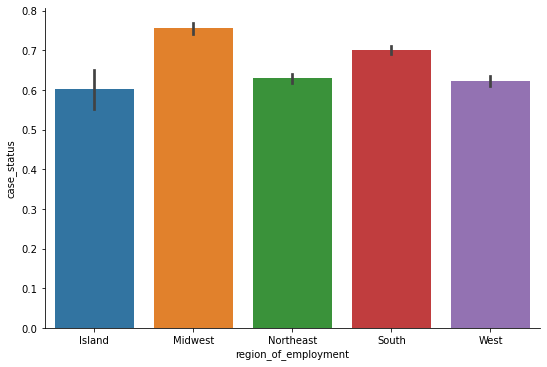

In [143]:
sns.catplot(x="region_of_employment",y="case_status", data=data, kind='bar', height=5, aspect=1.5, estimator=np.mean);

#### Observation
This shows that visa applicants wanting to work in the Midwest and the South had a slightly higher changes of getting certified.
Overall 60% chance of getting Certified for any region so this does not play an important role in the applicants certification.

#### In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

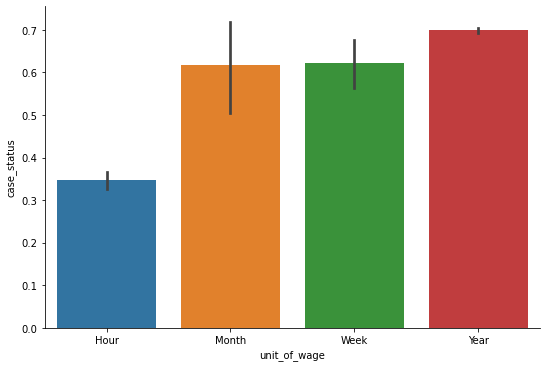

In [144]:
sns.catplot(x="unit_of_wage",y="case_status", data=data, kind='bar', height=5, aspect=1.5, estimator=np.mean);

#### Observation
We have more applicants that have wages reported as yearly compared to other unit_of_wage. comparing that to case_status it appears applicants who have yearly unit_of_wage have higher chances of getting certified.

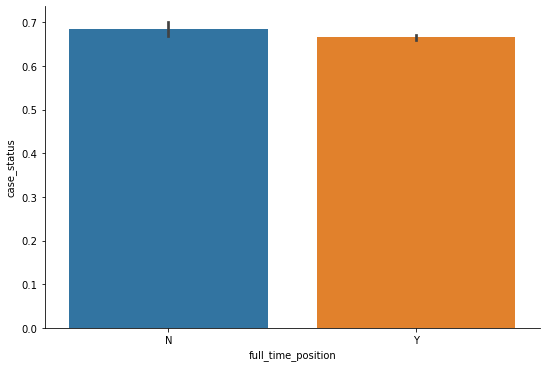

In [145]:
sns.catplot(x="full_time_position",y="case_status", data=data, kind='bar', height=5, aspect=1.5, estimator=np.mean);

#### Observation
This feature being employed full time or part time does not show a big preference in the visa getting certified.

### Bivariate HeatMap

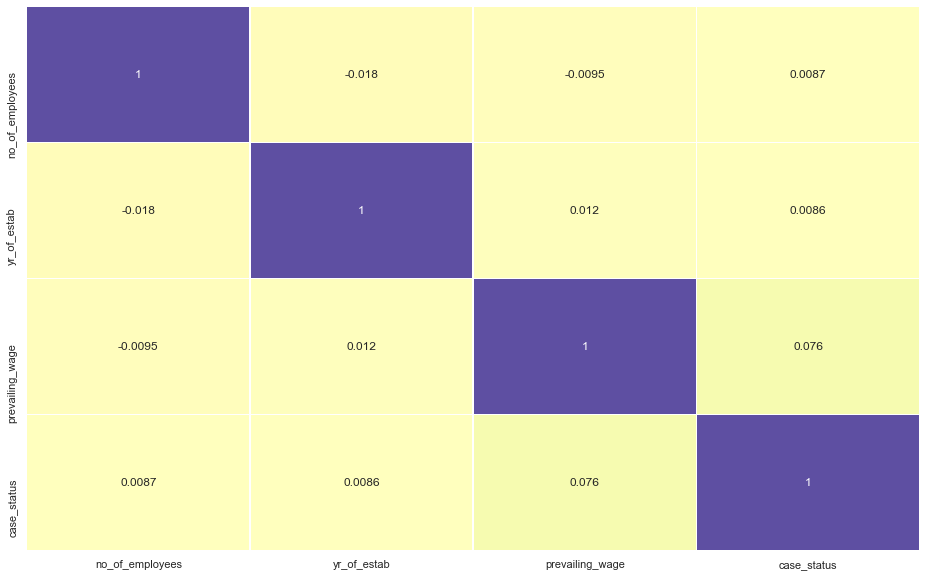

In [146]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

#### Observation
The variables show very low corelation with each other and with case_status.Prevailing_wage shows a 7.6% correlation to case_status. we can rule out multi-colinearity.

### Data pre-processing checks

In [147]:
# Duplicate value check
data.duplicated().sum()

0

 #### No Duplicate data

#### Checked for missing values earlier and found none.

### Outlier treatment (Maynot be needed)
Some features(no_of_employees and prevailing_wage) are very skewed and will likely behave better if they are treated.
We should bin these variables as it will be easier to handle later. Ensemble methods handle outliers so may not be needed.

In [148]:
# Do outlier treatment for screen_size, weight, new_price
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [149]:
num_vars = ['no_of_employees','prevailing_wage']
df_new = treat_outliers_all(data, num_vars)

In [150]:
df_new.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,7227,2007,West,592.2029,Hour,Y,0
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,EZYV03,Asia,Bachelor's,N,Y,7227,2008,West,122996.8600,Year,Y,0
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


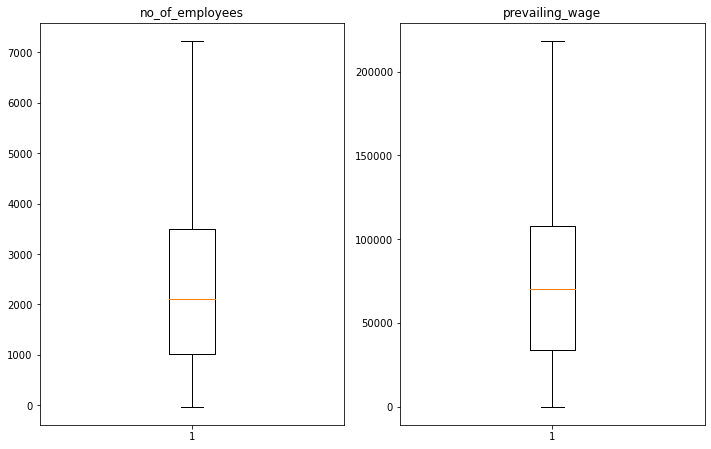

In [11]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_vars):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df_new[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observation
we want to do outlier treatment of the two continous variables(no_of_employees) and (prevaling_wage) so the distribution is more normal.

In [151]:
# make buckets for no_of_employees
df_new['wage_bin'] = pd.cut(
    df_new['prevailing_wage'], 3, 
    labels = ['average', 'More_than_Average', 'High']
)
df_new.drop(['prevailing_wage'], axis=1, inplace=True)
df_new['wage_bin'].value_counts(dropna=False)

average              13180
More_than_Average    10194
High                  2106
Name: wage_bin, dtype: int64

In [152]:
# make buckets for no_of_employees
df_new['employee_bin'] = pd.cut(
    df_new['no_of_employees'], 3, 
    labels = ['small', 'medium', 'big']
)
df_new.drop(['no_of_employees'], axis=1, inplace=True)
df_new['employee_bin'].value_counts(dropna=False)

small     14217
medium     8311
big        2952
Name: employee_bin, dtype: int64

In [153]:
df_new.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,yr_of_estab,region_of_employment,unit_of_wage,full_time_position,case_status,wage_bin,employee_bin
0,EZYV01,Asia,High School,N,N,2007,West,Hour,Y,0,average,big
1,EZYV02,Asia,Master's,Y,N,2002,Northeast,Year,Y,1,More_than_Average,medium
2,EZYV03,Asia,Bachelor's,N,Y,2008,West,Year,Y,0,More_than_Average,big
3,EZYV04,Asia,Bachelor's,N,N,1897,West,Year,Y,0,More_than_Average,small
4,EZYV05,Africa,Master's,Y,N,2005,South,Year,Y,1,High,small


### Pandas crosstab to look at the numbers and percentage

In [154]:
pd.crosstab(data.case_status,data.education_of_employee,margins=True)

education_of_employee,Bachelor's,Doctorate,High School,Master's,All
case_status,,,,,
0,3867,280,2256,2059,8462
1,6367,1912,1164,7575,17018
All,10234,2192,3420,9634,25480


#### Observation¶
62% of applicants that have a bachelor's degree get certified. 87% of applicants that have a doctors degree get certified. 34% of applicants that have a high school degree get certified. 78% of applicants with master's degree get certified.

In [268]:
pd.crosstab(data.case_status,data.continent,margins=True)

continent,Africa,Asia,Europe,North America,Oceania,South America,All
case_status,,,,,,,
0,154,5849,775,1255,70,359,8462
1,397,11012,2957,2037,122,493,17018
All,551,16861,3732,3292,192,852,25480


### Observation
72% of applicants that from Africa get certified.
65% of applicants that from Asia get certified.
79% of applicants that from Europe get certified.
61% of applicants from North America get certified.
63% of the applicants from Oceania get certified.
57% of the applicants from South America get Certified.

In [299]:
pd.crosstab(data.case_status,data.has_job_experience,margins=True)

has_job_experience,N,Y,All
case_status,,,
0,4684,3778,8462
1,5994,11024,17018
All,10678,14802,25480


### Observation
74% of the people that have prior experience get certified compared to 56% of the people with no job experience.

In [398]:
pd.crosstab(data.case_status,data.unit_of_wage,margins=True)

unit_of_wage,Hour,Month,Week,Year,All
case_status,,,,,
0,1410,34,103,6915,8462
1,747,55,169,16047,17018
All,2157,89,272,22962,25480


#### Observation
Almost 70% of the people whose reported wage was yearly were certified and only 34% of the hourly wage unit reported were Certified.

## Summary of EDA

### Data Description:

1. Dependent variable is "case_status" which is representing if the visa applicant got Certified or denied.
2. Most of the feature variables are category so we need to do one hot encoding for them to be used for our classification     models.
3. There are no missing values in the dataset.

### Data Cleaning:

 case_id is an ID variable so it is dropped from the data.
 
### Observations from EDA:
1. continent : There are 6 continents and the majority of the applicants are from asia.66%.
2. education_of_employees: The majority of them are bachelor's degree holders.40% are bachelors and masters is 37%. But when compared to the holders getting certified. doctor's and master's had an edge over bachelors.
3. Has_job_experience : About 58.1% of the workers all have experience in their field of work, 41.9% do not have experience in their field of work.
4. requires_job_training : about 80% have not needed any training only 11% of them have indicated they need to be trained.
5. no_of_employees: This data has a lot of outliers in the data.The data is very asymmertical.varing between 1 and 100,000.
6. yr_of_estab	: the min for the company is 1980 and most recent was 2016.
7. region_of_employment: Most of visa applicants seemed to be needed in the northwest/south and west. midwest is less and islands was very small number.
8. prevailing_wage : average wage was at 74k and some of the outliers indicated 319k wages as well.
9. unit_of_wage: most of wages reported were yearly followed by hourly.
10. full_time_position: many of the workers were full time positions 90% were as partime was 10%.

### Data pre-processing continued....

In [155]:
#Dropping columns - case_id- year_estb for company-not needed for the analysis
df_new.drop(columns=['case_id','yr_of_estab'], inplace=True)

In [156]:
df_new['has_job_experience'].replace({"Y":1,"N":0},inplace=True)

In [157]:
df_new['requires_job_training'].replace({"Y":0,"N":1},inplace=True)

In [158]:
df_new['full_time_position'].replace({"Y":1,"N":0},inplace=True)

In [159]:
#Creating dummies for categorical columns
oneHotCols = ['continent','education_of_employee','region_of_employment','unit_of_wage','employee_bin','wage_bin']
df_new=pd.get_dummies(data, columns=oneHotCols, drop_first=True)
df_new.head(5)


,has_job_experience,requires_job_training,full_time_position,case_status,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,...,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,employee_bin_medium,employee_bin_big,wage_bin_More_than_Average,wage_bin_High
0,0,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,1,1,1,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
3,0,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,1,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [160]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   has_job_experience                 25480 non-null  int64
 1   requires_job_training              25480 non-null  int64
 2   full_time_position                 25480 non-null  int64
 3   case_status                        25480 non-null  int64
 4   continent_Asia                     25480 non-null  uint8
 5   continent_Europe                   25480 non-null  uint8
 6   continent_North America            25480 non-null  uint8
 7   continent_Oceania                  25480 non-null  uint8
 8   continent_South America            25480 non-null  uint8
 9   education_of_employee_Doctorate    25480 non-null  uint8
 10  education_of_employee_High School  25480 non-null  uint8
 11  education_of_employee_Master's     25480 non-null  uint8
 12  region_of_employme

### Split data

In [161]:
# Separating features and the target column
X = df_new.drop('case_status', axis=1)
y = df_new['case_status']

In [162]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [163]:
X_train.shape, X_test.shape

((17836, 22), (7644, 22))

In [24]:
X_train.head()

,has_job_experience,requires_job_training,full_time_position,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,employee_bin_medium,employee_bin_big,wage_bin_More_than_Average,wage_bin_High
18177,1,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
20291,1,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
21717,1,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
6351,1,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0
7312,1,1,1,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


 ### create functions to calculate different metrics- Accuracy, Recall and Precision and F1 plot the confusion matrix.

In [164]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [165]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

### Decision Tree Classifier

In [166]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

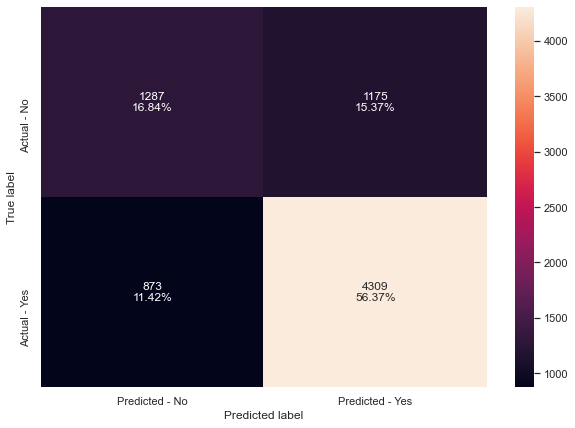

In [167]:
make_confusion_matrix(dTree,y_test)

In [168]:
#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(dTree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(dTree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.785939  0.874535   0.816067  0.84429
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.732077  0.831532    0.78574  0.807988


### Observation
The default decision Tree performance is not too bad it is giving 80 % F1 score, recall at 83% and precision at 78%.

In [169]:
feature_names = list(X.columns)
print(feature_names)

['has_job_experience', 'requires_job_training', 'full_time_position', 'continent_Asia', 'continent_Europe', 'continent_North America', 'continent_Oceania', 'continent_South America', 'education_of_employee_Doctorate', 'education_of_employee_High School', "education_of_employee_Master's", 'region_of_employment_Midwest', 'region_of_employment_Northeast', 'region_of_employment_South', 'region_of_employment_West', 'unit_of_wage_Month', 'unit_of_wage_Week', 'unit_of_wage_Year', 'employee_bin_medium', 'employee_bin_big', 'wage_bin_More_than_Average', 'wage_bin_High']


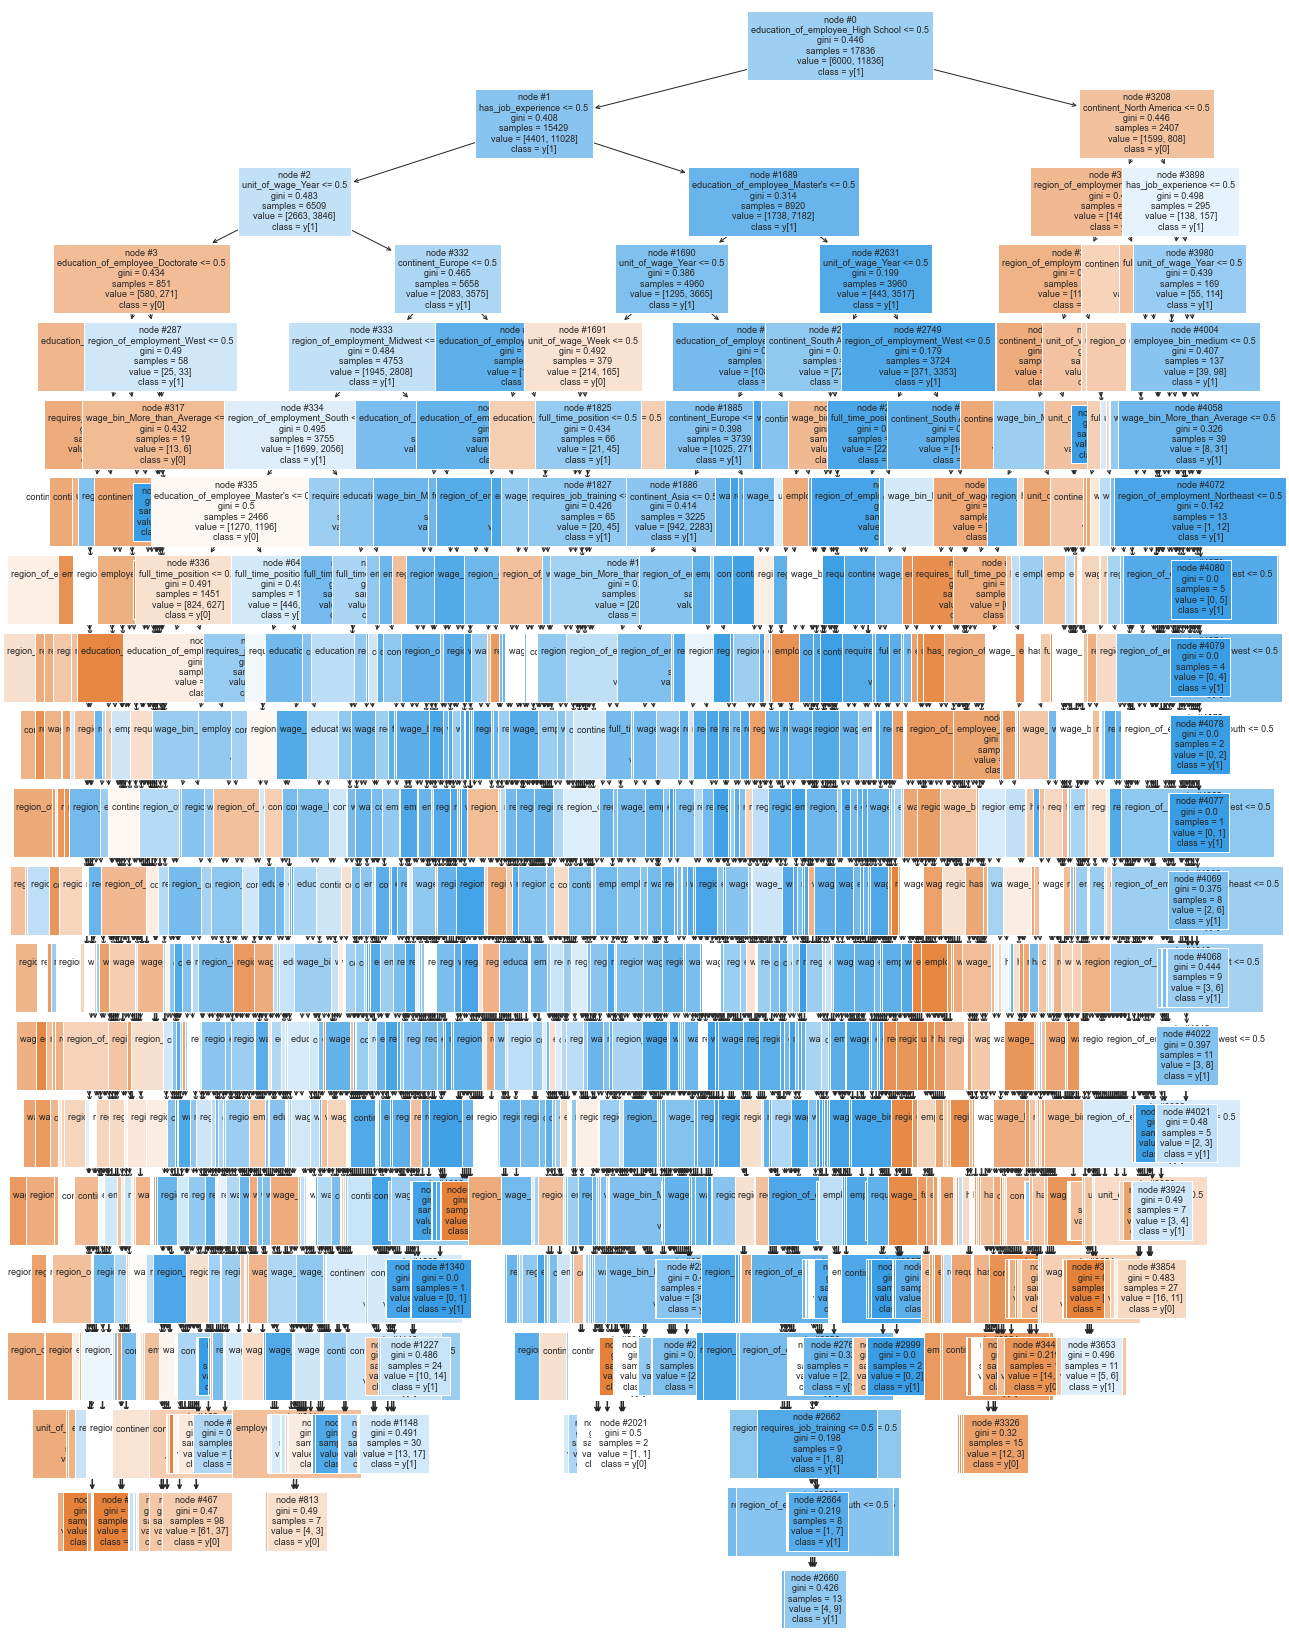

In [170]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [521]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- education_of_employee_High School <= 0.50
|   |--- has_job_experience <= 0.50
|   |   |--- unit_of_wage_Year <= 0.50
|   |   |   |--- education_of_employee_Doctorate <= 0.50
|   |   |   |   |--- education_of_employee_Master's <= 0.50
|   |   |   |   |   |--- requires_job_training <= 0.50
|   |   |   |   |   |   |--- continent_South America <= 0.50
|   |   |   |   |   |   |   |--- region_of_employment_Midwest <= 0.50
|   |   |   |   |   |   |   |   |--- region_of_employment_Northeast <= 0.50
|   |   |   |   |   |   |   |   |   |--- continent_North America <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- employee_bin_medium <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- employee_bin_medium >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- continent_North America >  0.50
|   |   |   |   |   |   |   |   |   |   |--- emplo

In [171]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.205787
has_job_experience                 0.134548
unit_of_wage_Year                  0.088835
continent_Europe                   0.048614
education_of_employee_Master's     0.045248
employee_bin_medium                0.042489
full_time_position                 0.042102
region_of_employment_Midwest       0.040138
wage_bin_More_than_Average         0.038701
education_of_employee_Doctorate    0.037442
employee_bin_big                   0.035781
region_of_employment_South         0.035739
requires_job_training              0.034263
wage_bin_High                      0.029244
continent_North America            0.028901
region_of_employment_West          0.023937
region_of_employment_Northeast     0.023629
continent_Asia                     0.022346
continent_South America            0.019410
continent_Oceania                  0.010000
unit_of_wage_Week                  0.008371
unit_of_wage_Month              

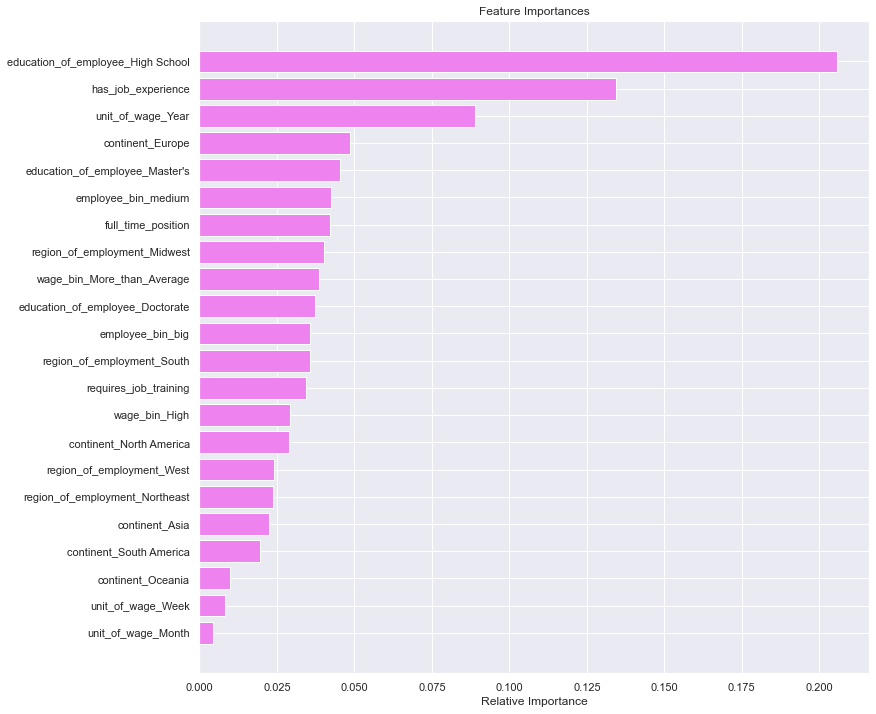

In [172]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation 
The top most important feature was having a high school diploma, followed by having job experience. If the wage was getting reported as yearly. If the applicant is from Europe and education (having a master's degree) featured again in the top 5.
Also if the employee is petioned by a medium size company being the 6th most important feature.


### Tuned Decision Tree

In [173]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=5,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

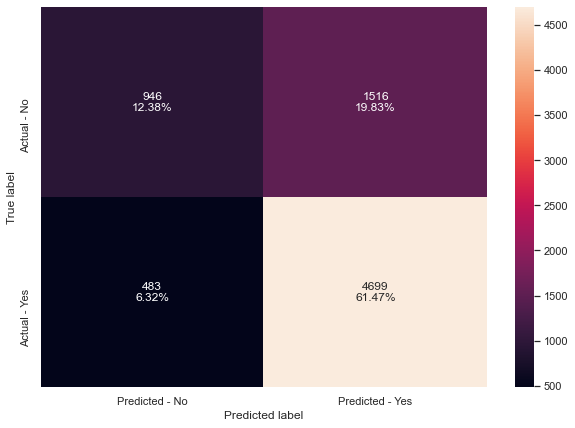

In [174]:
make_confusion_matrix(dTree1, y_test)

In [175]:
#Calculating different metrics
d_tree_model_train_tuned_perf=model_performance_classification_sklearn(dTree1,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_tuned_perf=model_performance_classification_sklearn(dTree1,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.785939  0.874535   0.816067  0.84429
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.732077  0.831532    0.78574  0.807988


#### Observation
The training data seem to overfit the recall metric.
The tuned decision Tree has is has Recall score at 90%. 82% on F1 score. But precision is somewhat lacking at 75%.

### Decision Tree Tuned

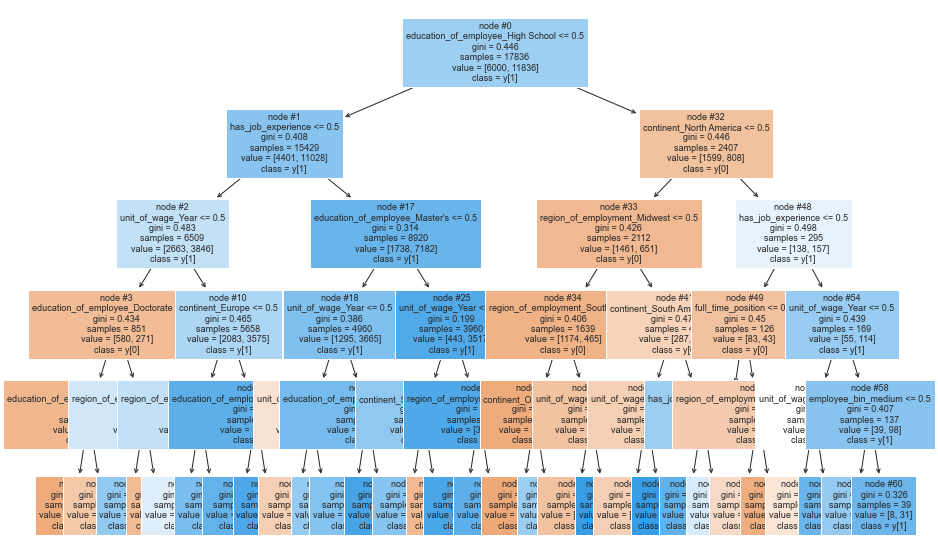

In [176]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [487]:
print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- education_of_employee_High School <= 0.50
|   |--- has_job_experience_Y <= 0.50
|   |   |--- unit_of_wage_Year <= 0.50
|   |   |   |--- education_of_employee_Doctorate <= 0.50
|   |   |   |   |--- education_of_employee_Master's <= 0.50
|   |   |   |   |   |--- weights: [334.00, 112.00] class: 0
|   |   |   |   |--- education_of_employee_Master's >  0.50
|   |   |   |   |   |--- weights: [221.00, 126.00] class: 0
|   |   |   |--- education_of_employee_Doctorate >  0.50
|   |   |   |   |--- region_of_employment_West <= 0.50
|   |   |   |   |   |--- weights: [12.00, 27.00] class: 1
|   |   |   |   |--- region_of_employment_West >  0.50
|   |   |   |   |   |--- weights: [13.00, 6.00] class: 0
|   |   |--- unit_of_wage_Year >  0.50
|   |   |   |--- continent_Europe <= 0.50
|   |   |   |   |--- region_of_employment_Midwest <= 0.50
|   |   |   |   |   |--- weights: [1699.00, 2056.00] class: 1
|   |   |   |   |--- region_of_employment_Midwest >  0.50
|   |   |   |   |   |--- weights: [246

In [177]:
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.367537
has_job_experience                 0.222447
unit_of_wage_Year                  0.148688
education_of_employee_Master's     0.063237
continent_Europe                   0.061553
region_of_employment_Midwest       0.046498
education_of_employee_Doctorate    0.042623
continent_North America            0.015949
unit_of_wage_Week                  0.008209
region_of_employment_West          0.007644
region_of_employment_South         0.004169
continent_South America            0.003957
continent_Oceania                  0.003910
full_time_position                 0.001554
unit_of_wage_Month                 0.000935
region_of_employment_Northeast     0.000664
employee_bin_medium                0.000424
continent_Asia                     0.000000
requires_job_training              0.000000
employee_bin_big                   0.000000
wage_bin_More_than_Average         0.000000
wage_bin_High                   

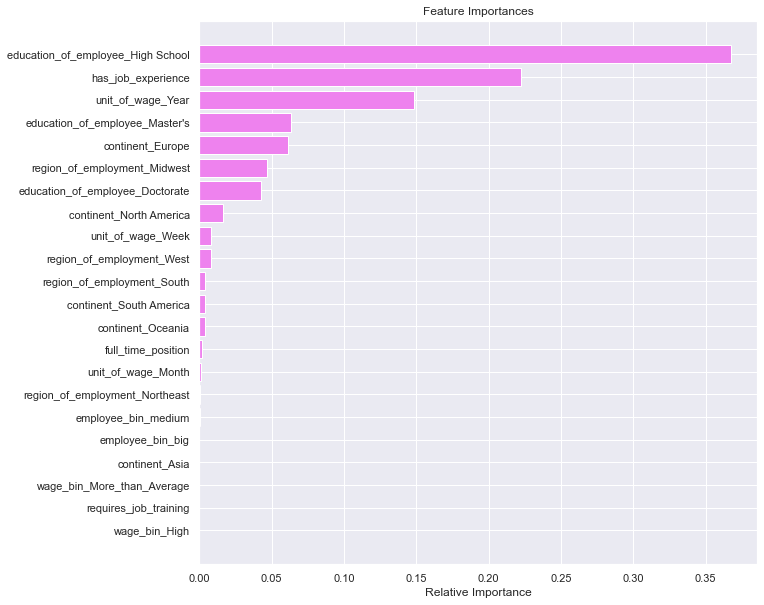

In [178]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observation
According to the tuned decision tree the top 5 important features are Education if they have a high school education and job experience for the job. The other important features are slightly arranged differently when compared to untuned model. If the reported wage is in yearly income.Applicants that have master's degree is also high on the list.If they are from the continent of Europe.

### Bagging Estimator

In [179]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [180]:
#Calculating different metrics
bagging_model_train_perf=model_performance_classification_sklearn(bagging_estimator,X_train,y_train)
print("Training performance:\n",bagging_model_train_perf)
bagging_model_test_perf=model_performance_classification_sklearn(bagging_estimator,X_test,y_test)
print("Testing performance:\n",bagging_model_test_perf)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.783303  0.8878   0.805519  0.844661
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.736395  0.850251   0.780514  0.813891


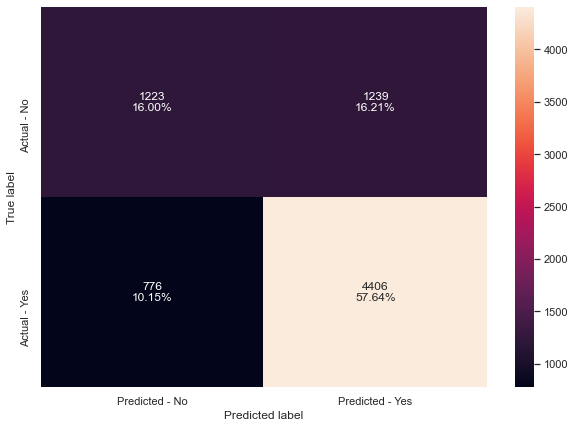

In [181]:
make_confusion_matrix(bagging_estimator,y_test)

#### Observation
Training and testing models observation performance is close, F1 score is at 81% and recall is at 85% however precision is some what less at 78%.

### Bagging Classifier tuned

In [182]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.5,0.7,0.9,1], 
              'max_features': [0.5,0.7,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.5, max_samples=1, n_estimators=40,
                  random_state=1)

In [183]:
#Using above defined function to get accuracy, recall and precision and F1 on train and test set
bagging_model_train_tuned_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_model_train_tuned_perf)
bagging_model_test_tuned_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n",bagging_model_test_tuned_perf)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.663602     1.0   0.663602  0.797789
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.677917     1.0   0.677917  0.808046


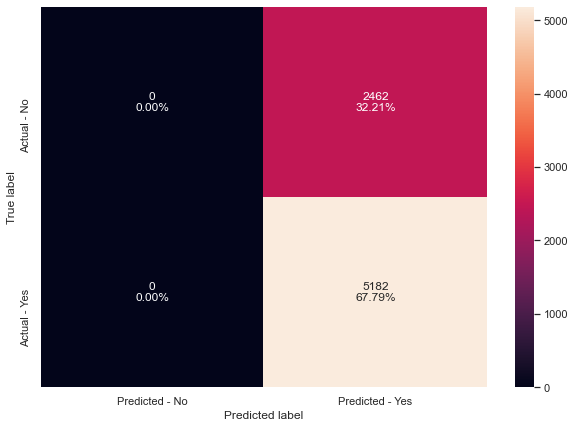

In [184]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

#### Observation
The tuned bagging classifier  is overfitting on the Recall score. 81% on F1 score. But precision and accuracy is somewhat lacking at 67%.

In [185]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [186]:
bagging_lr_model_train_tuned_perf=model_performance_classification_sklearn(bagging_lr,X_train,y_train)
print("Training performance:\n",bagging_lr_model_train_tuned_perf)
bagging_lr_model_test_tuned_perf=model_performance_classification_sklearn(bagging_lr,X_test,y_test)
print("Testing performance:\n",bagging_lr_model_test_tuned_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.737217  0.878591   0.761887  0.816088
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.739927  0.877267    0.77077  0.820578


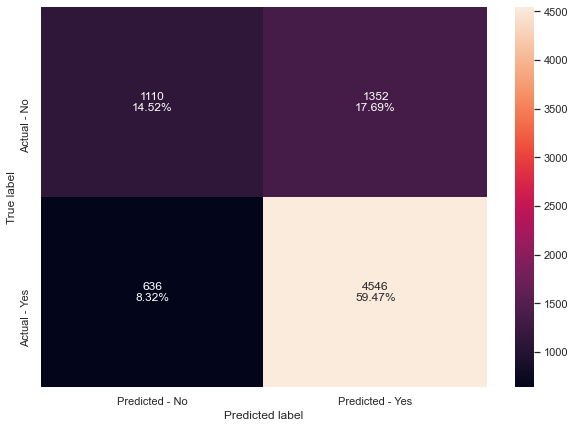

In [187]:
make_confusion_matrix(bagging_lr,y_test)

### Observation
Bagging classifier with logistic regression as base_estimator is not overfitting the data. The recall is at 87%. Precision and accuracy are in the upper 74+%.F1 score that is important as we want to know who got certified and who got deneid is at 82% so far the highest.
Ensemble models are less interpretable than decision tree but bagging classifier is even less interpretable than random forest. It does not even have a feature importance attribute.

## Random forest classifier

In [188]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [189]:
#Using above defined function to get accuracy, recall and precision and F1 on train and test set
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.785882  0.892024   0.806016  0.846842
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.738619  0.855847   0.779986  0.816158


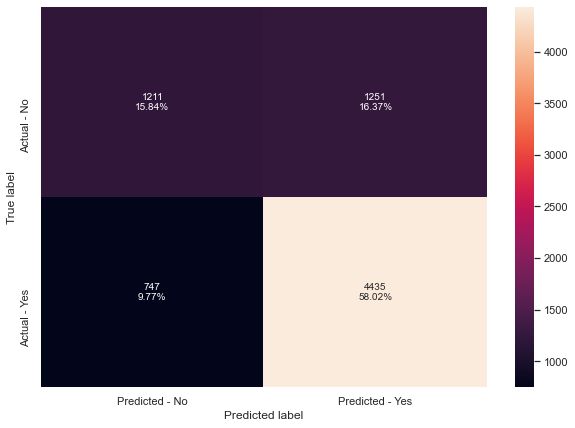

In [568]:
make_confusion_matrix(rf_estimator,y_test)

#### Observation
The Random forest model is showing recall at 85% and precision at 77% and F1 score is at 81% appears to be good. Let us build other models to compare performance.

### Random Forest Tuned

In [190]:
###### Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article

parameters = {"class_weight": [{0: 0.6, 1: 0.4}],
             "n_estimators": [150,200,250],
             "min_samples_leaf": np.arange(3,5),
             "max_features": np.arange(0.2, 0.7, 0.1),   
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.6, 1: 0.4}, max_features=0.2,
                       min_samples_leaf=4, n_estimators=150, random_state=1)

In [47]:
#Using above defined function to get accuracy, recall and precision and F1 on train and test set
rf_estimator_model_train_tuned_perf=model_performance_classification_sklearn(rf_estimator_tuned,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_tuned_perf)
rf_estimator_model_test_tuned_perf=model_performance_classification_sklearn(rf_estimator_tuned,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_tuned_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.75813  0.822913   0.814517  0.818694
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.739796  0.806252   0.809219  0.807733


#### Observation
The tuned Random Forest is showing good performance with the test data with recall at 80% and precision at 81%. F1 score is at 80%. This model appears to do well overall. This model appers to be better than the random forest that is not tuned.

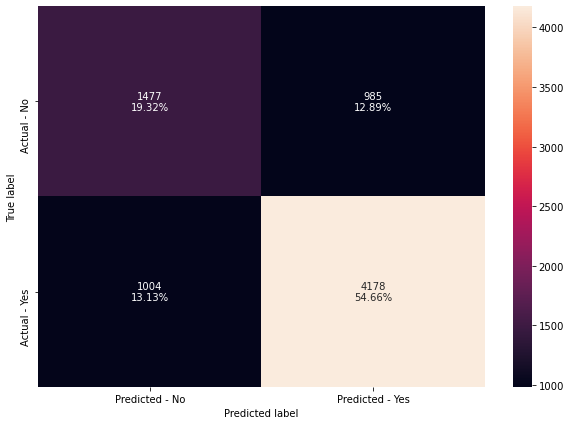

In [48]:
make_confusion_matrix(rf_estimator_tuned,y_test)

### Insights
We can see that random forest's performance has increased as compared to the random forest model with default parameters.
We are getting a higher F1 score for the prediction.

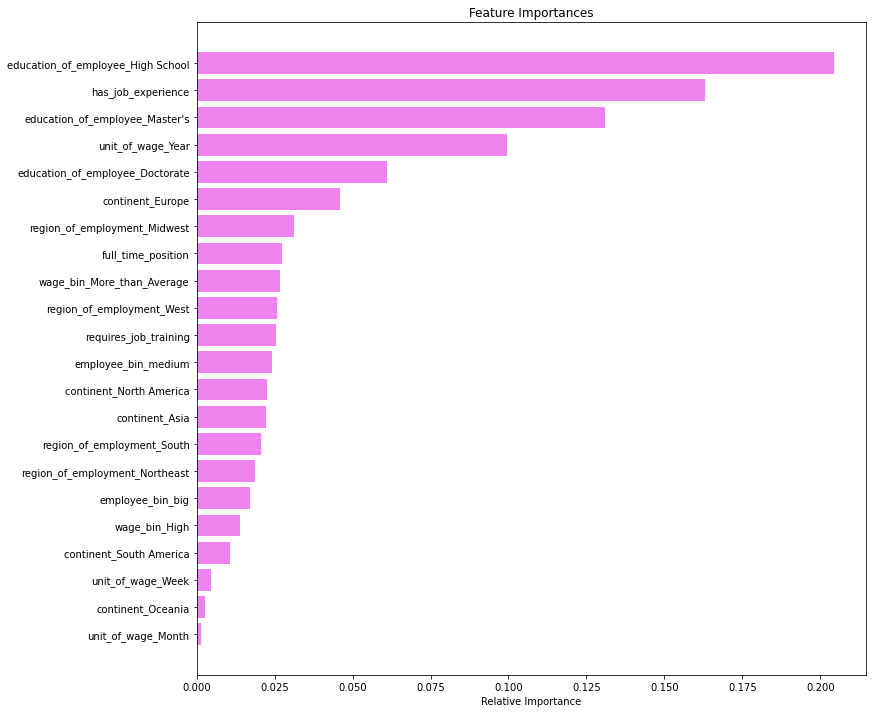

In [49]:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observation
The top 5 features are slightly different from the previous model.
1. Most important being a high school diploma.
2. Having job expreience being second most important.
3. If the applicant has a master's degree.
4. If the wage is reported as yearly unit.
5. if the applicant had a doctorate degree.
6. If the applicant is from Europe.

### AdaBoost Classifier

#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

#### Observation
Adaboost is giving more generalized performance than previous models the test model is showing better metrics data compared to the training data.

### AdaBoost Tuned Model

In [70]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=3),
                      DecisionTreeClassifier(max_depth=5)],
    "n_estimators": np.arange(10,110,20),
    "learning_rate":np.arange(0.1,2,0.2)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.30000000000000004, n_estimators=10,
                   random_state=1)

   Accuracy    Recall  Precision       F1
0  0.754766  0.876479   0.780822  0.82589
   Accuracy    Recall  Precision        F1
0  0.750392  0.868777   0.785689  0.825147


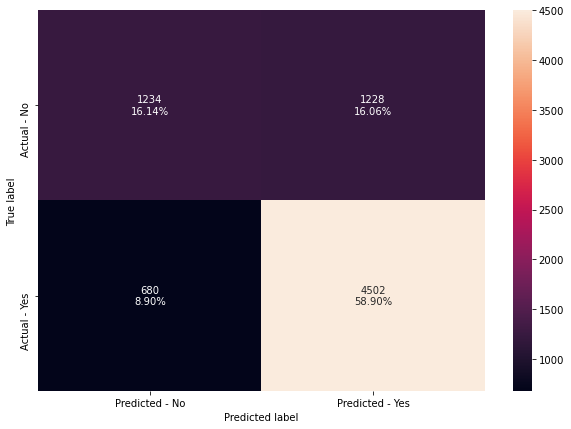

In [71]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

#### Observation
The Recall and precision is similar and F1 score is slightly improved with the tuned model. Let us see if other boosting model is better at the prediction.

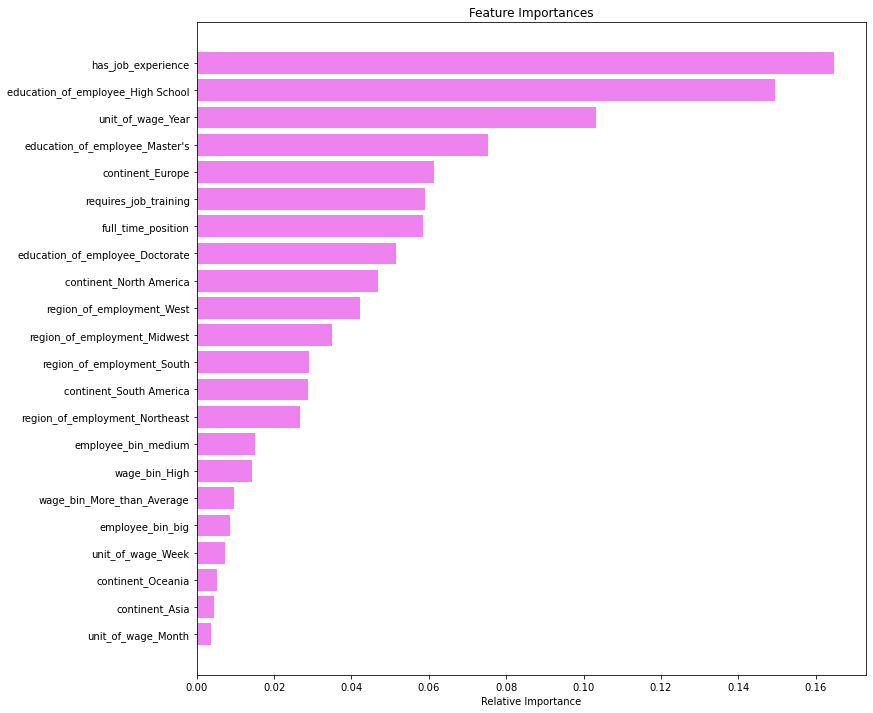

In [72]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observation
1. The feature that indicates the applicant has job experience  being the most important. 
2. If the applicant had a high school diploma.
3. If the wages were reported as a yearly unit.
4. Having a master's degree also helps the applicants chances of being certified.
5. If you are from continent Europe.
6. If a person required job training or not was import as well.

### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.754205  0.871156   0.782916  0.824682
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.749346  0.862987   0.787601  0.823573


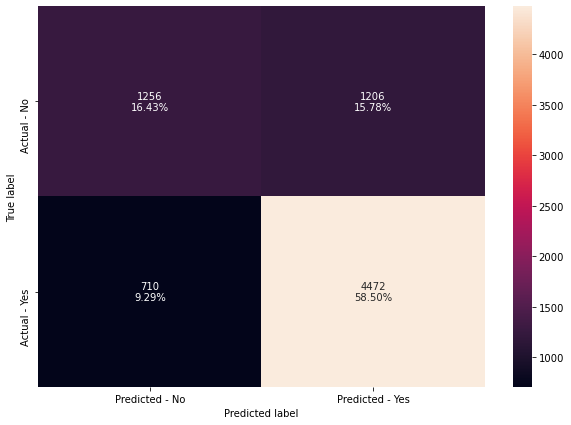

In [75]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

### Observation
This model gradient boost classifier has similar performance like the  adaboost tuned is performing slightly better with respect to the F1 score.

### Gradient Boosting Tuned

In [76]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250,300],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=200, random_state=1,
                           subsample=0.8)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.756728  0.871071   0.785644  0.826155
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.75314  0.864917   0.790616  0.826099


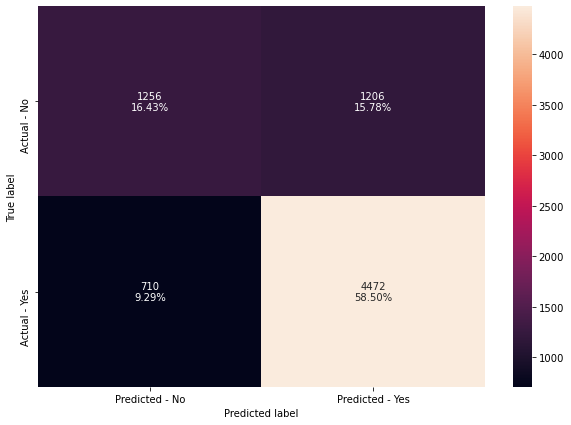

In [113]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)
#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

#### Observation
There appears to be a 1% boost to these metrics precision/recall and F1 score.

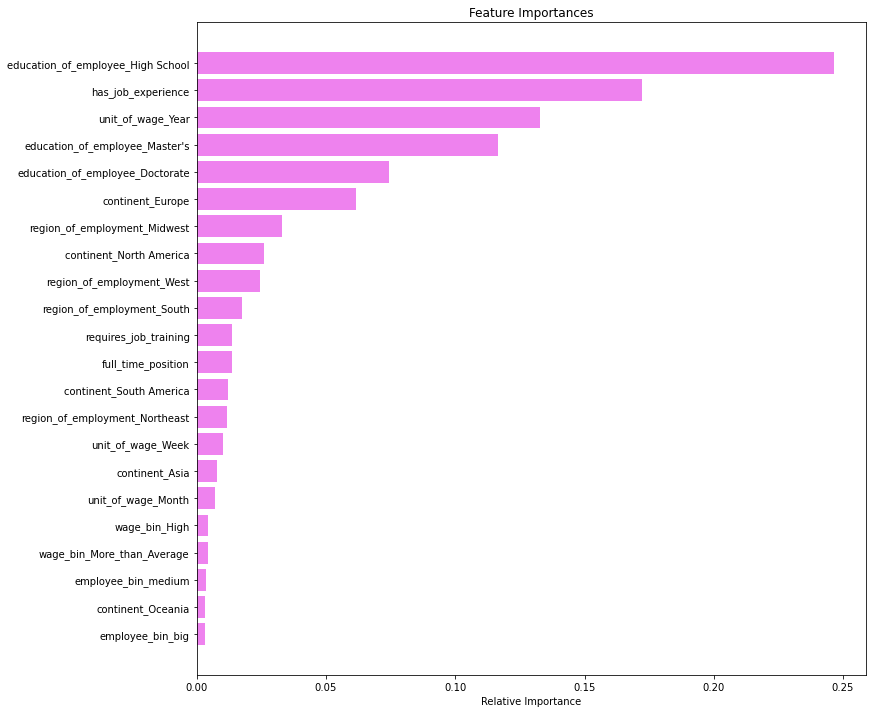

In [78]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observation
1. Education of the applicant is top 3 features, the most important being high school diploma.
2. Having work experience was important.
3. The unit wage getting reported as yearly is important as well.
4. Having a masters degree was 4th import feature.
5. Followed by having a Doctorate degree.
6. If the applicant is from Europe.

### Stacking Classifier

In [79]:
estimators = [('Random Forest',rf_estimator_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dTree1)]

final_estimator = abc_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.6,
                                                                     1: 0.4},
                                                       max_features=0.2,
                                                       min_samples_leaf=4,
                                                       n_estimators=150,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Decision Tr

Training performance:
    Accuracy    Recall  Precision        F1
0   0.75656  0.874789   0.783563  0.826667
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.749084  0.865689   0.785915  0.823875


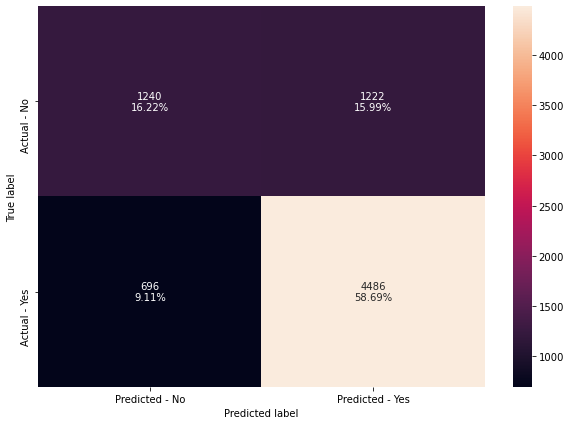

In [80]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

### Comparing Models for the performance

In [81]:
# training performance comparison 

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,d_tree_model_train_tuned_perf.T,rf_estimator_model_train_perf.T,rf_estimator_model_train_tuned_perf.T,
     bagging_model_train_perf.T,bagging_lr_model_train_tuned_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "Stacking classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,Stacking classifier
Accuracy,0.734862,0.734862,0.785882,0.758130,0.783303,0.737217,0.735086,0.754766,0.754205,0.756728,0.756560
Recall,0.911541,0.911541,0.892024,0.822913,0.887800,0.878591,0.880027,0.876479,0.871156,0.871071,0.874789
Precision,0.745560,0.745560,0.806016,0.814517,0.805519,0.761887,0.759128,0.780822,0.782916,0.785644,0.783563
F1,0.820238,0.820238,0.846842,0.818694,0.844661,0.816088,0.815119,0.825890,0.824682,0.826155,0.826667


In [82]:
# testing performance comparison 

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,d_tree_model_test_tuned_perf.T,rf_estimator_model_test_perf.T,rf_estimator_model_test_tuned_perf.T,
     bagging_model_test_perf.T,bagging_lr_model_test_tuned_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "Stacking classifier"
    ]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,Stacking classifier
Accuracy,0.738488,0.738488,0.738619,0.739796,0.736395,0.739927,0.739273,0.750392,0.749346,0.753140,0.749084
Recall,0.906793,0.906793,0.855847,0.806252,0.850251,0.877267,0.880934,0.868777,0.862987,0.864917,0.865689
Precision,0.756074,0.756074,0.779986,0.809219,0.780514,0.770770,0.768389,0.785689,0.787601,0.790616,0.785915
F1,0.824603,0.824603,0.816158,0.807733,0.813891,0.820578,0.820822,0.825147,0.823573,0.826099,0.823875


#### Observation
All the models are within a 1% or 2% difference of each other when it comes to the metrics score.
Comparing all the models, we should go with the Gradient Boosting Classifier Tuned Model as it is giving us better scores with Recall(86.4%) and Precision(79%) and has the highest F1 score for the testing data(82.6%).


#### Actionable Insights and Recommendations
1. Education is the top most feature(High school, masters, doctorate)
2. Having Job experience comes next.
3. Having wages reported as yearly unit of wage was important.
4. If the applicant is from Europe that was also important.
5. Region where they would be working in the USA had some significance not a lot. If the applicant was placed in the mid-west or the West.
6. If the applicant belonged to the North America also had a minor significance.

#### Recommendations
1. The EasyVisa company can take the machine learning model to private companies that are looking to hire workers thru the visa program and profile candidates that are likely to get certified or denied.
2. Applicants who are in the technical field can benefit by looking for applicants that have a master or a doctorate degree. The chances of them getting certified is high.
3. If the applicant is a High school graduate the chances of them getting certified is the lowest at 34%.
4. They can also help pick out applicants that have previous job experience.
5. Applicants who have an offer from companies with wages reported as yearly also have a higher percentage of getting certified.
6. Applicants from the continent of Europe or from the north American contient also had higher chances of getting certified.
7. Applicants getting paid more than the average amount or belong to the wage_bin_high have higher chances of getting certified.
8. The region within the USA as to where they may work also plays a role in the applicant getting certified. Mid_west/west and south had some feature importance.
9. Applicants that need job training is a risk that could indicate that the chances of getting denied maybe higher.
10. Applicant being offered a full time job was not high on the feature list.But could be an indicate chances of that the applicant getting certified.
11. The size of the Employer plays a very small role in the applicant being successfully certified. Employers that are medium sized or big have higher certification chances than smaller employers.